<a href="https://colab.research.google.com/github/kwcjwm/ai-chatpdf/blob/main/%5B%EC%8B%A4%EC%8A%B5%5D_9_LangChain%EA%B3%BC_%EB%8B%A4%EC%96%91%ED%95%9C_%ED%88%B4_%EC%97%B0%EB%8F%99_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실습] LangChain과 다양한 툴 연동하기  

LangChain의 Tool은 OpenAI의 Tool과 유사합니다.

Tool은 LLM이 답변을 출력하기 위해 활용할 수 있는 다양한 수단을 의미합니다.   
LLM은 Tool에 입력을 전달하고, 답변을 파싱하는 작업을 수행합니다.

이번 실습에서는 3개의 툴을 사용해 보겠습니다.

In [ ]:
!pip install openai matplotlib langchain langchain-openai langchain-community langchain-tavily langgraph langchain-experimental -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 16.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv('env', override=True)

llm = ChatOpenAI(model = 'gpt-4.1-mini', max_tokens=1024, temperature=0.1)
gpt5 = ChatOpenAI(model = 'gpt-5-mini', reasoning_effort='low')

Tavily: 웹 검색 툴

In [ ]:
from langchain_tavily import TavilySearch

# TAVILY : 웹 검색을 수행하는 툴
# TAVILY_API_KEY https://app.tavily.com/home

In [ ]:
max_results=3
tavily_search = TavilySearch(max_results=max_results)
tavily_search.invoke("클로드 3 소넷")

{'query': '클로드 3 소넷',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.anthropic.com/news/claude-3-5-sonnet',
   'title': 'Introducing Claude 3.5 Sonnet - Anthropic',
   'content': '# Claude 3.5 Sonnet Claude 3.5 Sonnet raises the industry bar for intelligence, outperforming competitor models and Claude 3 Opus on a wide range of evaluations, with the speed and cost of our mid-tier model, Claude 3 Sonnet. Claude 3.5 Sonnet is our strongest vision model yet, surpassing Claude 3 Opus on standard vision benchmarks. It’s just the beginning of a broader vision for Claude.ai, which will soon expand to support team collaboration. We recently provided Claude 3.5 Sonnet to the UK’s Artificial Intelligence Safety Institute (UK AISI) for pre-deployment safety evaluation. You can submit feedback on Claude 3.5 Sonnet directly in-product to inform our development roadmap and help our teams to improve your experience. Oct 20, 2025News Oct 20, 2025News',
 

In [ ]:
from langchain_core.tools import tool

@tool
def web_search(query, max_results=5):
    """Tavily API를 통해 검색 결과를 가져옵니다.
주어진 주제에 맞는 적절한 argument 값을 선정하세요.
query: 검색어
max_results : 검색 결과의 수(최소 1, 최대 20, 별도의 요청이 없으면 5로 고정)"""
    tavily_search = TavilySearch(max_results=max_results)

    search_results = tavily_search.invoke(query)['results']

    context =''
    for doc in search_results:
        doc_content = doc.get('content')

        context += '\n\nTITLE: ' + doc.get('title','N/A') + '\nURL:' + doc.get('url')+ '\nContent:'+ doc_content
    return context

커스텀 함수를 툴로 변환하는 것도 가능합니다.

Multiply: 곱하기 함수

In [ ]:
context = web_search.invoke("Qwen 3 Next가 어떤 모델이야?")
print(context)



TITLE: Qwen3‑Next란 무엇인가? Alibaba Qwen의 차세대 AI 모델 심층 분석
URL:https://sider.ai/ko/blog/ai-tools/what-is-qwen3-next-inside-alibaba-qwen-s-next-gen-ai-model
Content:간단히 말해, Qwen의 기반 모델의 차세대 버전으로, 완전히 새로운 아키텍처를 통해 긴 컨텍스트 성능과 훈련/추론 효율성을 향상시키도록 설계되었으며,

TITLE: 새로운 Qwen3 Max 모델이 GPT-5 & GPT-OSS-120B보다 더 창의적이야
URL:https://www.reddit.com/r/LocalLLaMA/comments/1nc866i/the_new_qwen3_max_model_is_more_creative_than/?tl=ko
Content:그리고 Grok 4가 이렇게 좋을 줄은 몰랐어! 진짜 모델 오픈소스 했으면 좋겠다, Qwen이 클로즈 소스 되는 거 보니까 슬프네.

TITLE: Qwen3-Next-80B-A3B - 지금까지 나온 오픈 소스 추론 모델 중 최고일 ...
URL:https://www.reddit.com/r/LocalLLaMA/comments/1netdjp/qwen3next80ba3b_a_big_step_up_may_be_the_best/?tl=ko
Content:기본적으로 C를 중심으로 하는 로크리안입니다. 실제 음 중심은 C에 있지만, Gb 베이스 드론은 C보다 더 안정적으로 들립니다 (가끔 연주됨). 그래서 Gb가

TITLE: Qwen3-235B-A22B-2507는 lmarena에서 최고의 오픈 가중치 모델이야.
URL:https://www.reddit.com/r/LocalLLaMA/comments/1mf0qlf/qwen3235ba22b2507_is_the_top_open_weights_model/?tl=ko
Content:이 모델 꽤 많이 써봤는데 (UD-Q4_K_XL) 진짜 걍 내 맘속 1등 로컬 모델임. 똑똑하고 깊이가 있어서

In [ ]:
from langchain_core.tools import tool

@tool
def multiply(x:int, y:int) -> int:
    "x와 y를 입력받아, x와 y를 곱한 결과를 반환합니다."
    return x*y

@tool
def current_date() -> str:
    "현재 날짜를 %y-%m-%d 형식으로 반환합니다."
    from datetime import datetime
    return f'현재 날짜는 {datetime.now().strftime("%Y-%m-%d")} 입니다!'

print(multiply.invoke({'x':3, 'y':4}))
print(current_date.invoke({}))


12
현재 날짜는 2025-10-21 입니다!


위에서 만든 툴을 리스트로 묶고, LLM에 binding합니다.

In [ ]:
tools = [multiply, web_search, current_date]

In [ ]:
llm_with_tools = llm.bind_tools(tools)
llm_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x7f3c03b072f0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7f3c03af29f0>, root_client=<openai.OpenAI object at 0x7f3ceae67f20>, root_async_client=<openai.AsyncOpenAI object at 0x7f3c03b072c0>, model_name='gpt-4.1-mini', temperature=0.1, model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True, max_tokens=1024), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'x와 y를 입력받아, x와 y를 곱한 결과를 반환합니다.', 'parameters': {'properties': {'x': {'type': 'integer'}, 'y': {'type': 'integer'}}, 'required': ['x', 'y'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'web_search', 'description': 'Tavily API를 통해 검색 결과를 가져옵니다.\n주어진 주제에 맞는 적절한 argument 값을 선정하세요.\nquery: 검색어\nmax_results : 검색 결과의 수(최소 1, 최대 20, 별도의 요청이 없으면 5로 고정)', 'parameters': {'properties': {'query': {}, 'max_results':

llm_with_tools는 llm에 tool이 결합된 형태지만, llm의 구조입니다.   
invoke를 통해 툴을 사용하도록 유도해 봅시다.

In [ ]:
# 툴 실행을 하지 않음
llm_with_tools.invoke("안녕?")

AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 174, 'total_tokens': 186, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CSzWW13FWqQA4O43unfBMR0gY9tek', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9dd16e03-e244-41ec-aabf-5a064fb08d7e-0', usage_metadata={'input_tokens': 174, 'output_tokens': 12, 'total_tokens': 186, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
llm_with_tools.invoke("29392 * 23919는 뭐야?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_nZKzFdo1R2aENSN2cwTgpCEE', 'function': {'arguments': '{"x":29392,"y":23919}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 181, 'total_tokens': 200, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CSzWvDZs1KQwJwKIwSLG7hjRutMXW', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b3336522-5fe4-4f8b-8780-2533d38a8e8a-0', tool_calls=[{'name': 'multiply', 'args': {'x': 29392, 'y': 23919}, 'id': 'call_nZKzFdo1R2aENSN2cwTgpCEE', 'type': 'tool_call'}], usage_metadata={'input_tokens': 181, 'output_tokens': 19, 'total_tokens': 200, 'input_token_details

In [ ]:
# 툴 실행을 하지 않을 확률이 높음
llm_with_tools.invoke("양자 컴퓨터의 정의가 뭐야?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_KEvPnfPCwViqZamJBm3rjipx', 'function': {'arguments': '{"query":"양자 컴퓨터 정의"}', 'name': 'web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 181, 'total_tokens': 199, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CSzYKr0BGkXqcVH9KYNx3L6AUMBbv', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8c296c63-dc54-4aa7-af82-48063497aa40-0', tool_calls=[{'name': 'web_search', 'args': {'query': '양자 컴퓨터 정의'}, 'id': 'call_KEvPnfPCwViqZamJBm3rjipx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 181, 'output_tokens': 18, 'total_tokens': 199, 'input_token_detai

In [ ]:
llm_with_tools.invoke("양자 컴퓨터 최신 소식 있어?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Gnuhptwbwn44sIK8JcWRT9uN', 'function': {'arguments': '{"query":"양자 컴퓨터 최신 소식","max_results":5}', 'name': 'web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 180, 'total_tokens': 205, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CSzYOFmcXYrLAiOE9aVh5ttcoi20g', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bca16b75-d10d-4d70-afd3-3d838aa5eb32-0', tool_calls=[{'name': 'web_search', 'args': {'query': '양자 컴퓨터 최신 소식', 'max_results': 5}, 'id': 'call_Gnuhptwbwn44sIK8JcWRT9uN', 'type': 'tool_call'}], usage_metadata={'input_tokens': 180, 'output_tokens': 25,

content를 생성하는 대신에, tool_calls가 도출된 것을 볼 수 있습니다.

In [ ]:
llm_with_tools.invoke("29392 * 23919는 뭐야?").tool_calls

[{'name': 'multiply',
  'args': {'x': 29392, 'y': 23919},
  'id': 'call_n0PjayifIDPkCmh1bVum5WHK',
  'type': 'tool_call'}]

In [ ]:
llm_with_tools.invoke("오늘 운동을 빠질까요?").tool_calls

[]

Tool을 실행할 때, tool_call 정보를 보내면 ToolMessage 형식의 결과가 생성됩니다.   

이후, 이 내용을 메시지에 넣어서 전달하면 됩니다.

In [ ]:
multiply.invoke(llm_with_tools.invoke("29392 * 23919는 뭐야?").tool_calls[0])

ToolMessage(content='703027248', name='multiply', tool_call_id='call_79Pc1FYDE9R1Kh4DDq2zYGvF')

In [ ]:
# Message 전달하기 예시
from langchain_core.messages import HumanMessage, AIMessage, ToolMessage

question = '29392 * 23919가 뭐야?'
# HumanMessage

tool_call_msg = llm_with_tools.invoke(question)
# AIMessage (tool_calls가 포함된)

tool_msg = multiply.invoke(tool_call_msg.tool_calls[0])
# ToolMessage


msgs = [HumanMessage(question),
       tool_call_msg,
       tool_msg]

llm_with_tools.invoke(msgs)

AIMessage(content='29392 * 23919는 703,027,248입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 210, 'total_tokens': 226, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CSzpuoqF0MWEb6Q6LSNlZhOjESy4M', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--18da9e52-8383-4681-8116-ccc5295e546a-0', usage_metadata={'input_tokens': 210, 'output_tokens': 16, 'total_tokens': 226, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### Agent(에이전트)
에이전트는 사용자의 요청에 따라 순차적으로 입력할 프롬프트를 생성하고, 이를 바탕으로 결과를 도출하는 모듈입니다.   

llm 실행 --> Tool 요청 --> Tool 실행 결과 전달 --> llm 실행 --> 의 과정을 반복합니다.   

In [ ]:
tools = [multiply, web_search, current_date]

In [ ]:
def react_agent(llm, question , tools = [web_search]):

    # 툴과 LLM 구성

    tool_list = {x.name: x for x in tools}
    # tavily_search.name = 'tavily_search' 을 이용하면
    # tool_list = {'tavily_search': tavily_search} 와 동일합니다.

    llm_with_tools = llm.bind_tools(tools)


    # 메시지 구성
    messages = [HumanMessage(question)]
    print('Query:', question)


    # LLM에 메시지 전달 (분기)
    tool_msg = llm_with_tools.invoke(question)
    # 1) 툴이 필요없으면: 응답 후 종료
    # 2) 툴이 필요하면: AIMessage (+ Tool Call)
    print('## LLM 호출 ##')
    messages.append(tool_msg)

    if tool_msg.content:
        print('LLM:', tool_msg.content)

    while tool_msg.tool_calls:
        # 툴 호출이 있을 경우: 툴 실행 후 결과를 전달 (반복)

        for tool_call in tool_msg.tool_calls:
            tool_name = tool_call['name']

            print(f"-- {tool_name} 사용 중 --")
            print(tool_call)


            tool_exec = tool_list[tool_name]

            tool_result = tool_exec.invoke(tool_call)
            messages.append(tool_result)
        tool_msg = llm_with_tools.invoke(messages)
        print('## LLM 호출 ##')
        messages.append(tool_msg)

        if tool_msg.content:
            print('LLM:', tool_msg.content)


    result = tool_msg

    return messages

In [ ]:
response = react_agent(llm, "Gemma 3 모델의 장단점 검색해서 알려줘. 매번 툴 요청과 함께, 어떤 툴을 어떻게 실행할 건지 활기차게 말해줘.", tools = tools)

response

Query: Gemma 3 모델의 장단점 검색해서 알려줘. 매번 툴 요청과 함께, 어떤 툴을 어떻게 실행할 건지 활기차게 말해줘.
## LLM 호출 ##
LLM: 좋아요! Gemma 3 모델의 장단점을 알아보기 위해 웹 검색을 활용해볼게요. 최신 정보와 다양한 의견을 얻기 위해 "Gemma 3 모델 장단점"이라는 키워드로 검색을 실행하겠습니다. 바로 검색을 시작할게요!
-- web_search 사용 중 --
{'name': 'web_search', 'args': {'query': 'Gemma 3 모델 장단점', 'max_results': 5}, 'id': 'call_rf157HzfsNBysiB4xCzCfKzy', 'type': 'tool_call'}
## LLM 호출 ##
LLM: 와우! Gemma 3 모델에 대해 다양한 정보를 찾았어요. 요약해보면,

장점:
- 멀티모달 기능 지원: 텍스트와 이미지 입력 모두 처리 가능
- 다양한 크기와 정밀도로 제공되어 하드웨어 환경과 성능 요구에 맞게 선택 가능
- 질문 답변, 텍스트 요약, 논리적 추론, 창의적 텍스트 생성, 이미지 분석 등 광범위한 작업 수행 가능
- 고해상도 이미지 처리 기능과 광범위한 언어 지원
- 효율적이고 안전한 AI 모델로 개발자에게 접근성 좋음
- 상대적으로 작은 규모로도 높은 성능 발휘

단점에 대한 직접적인 언급은 검색 결과에서 명확하지 않았지만, 모델 크기와 성능 간의 균형을 맞추는 점에서 사용 환경에 따라 제약이 있을 수 있을 것으로 추정됩니다.

더 구체적인 단점이나 추가 정보가 필요하면 알려주세요!


[HumanMessage(content='Gemma 3 모델의 장단점 검색해서 알려줘. 매번 툴 요청과 함께, 어떤 툴을 어떻게 실행할 건지 활기차게 말해줘.', additional_kwargs={}, response_metadata={}),
 AIMessage(content='좋아요! Gemma 3 모델의 장단점을 알아보기 위해 웹 검색을 활용해볼게요. 최신 정보와 다양한 의견을 얻기 위해 "Gemma 3 모델 장단점"이라는 키워드로 검색을 실행하겠습니다. 바로 검색을 시작할게요!', additional_kwargs={'tool_calls': [{'id': 'call_rf157HzfsNBysiB4xCzCfKzy', 'function': {'arguments': '{"query":"Gemma 3 모델 장단점","max_results":5}', 'name': 'web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 212, 'total_tokens': 301, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CT0DSqmeLJO3r8YQsW4hS2kTpgjOb', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id

In [ ]:
question = """
레오나르도 디카프리오의 출생년도를 찾은 뒤, 각 숫자를 순서대로 곱해줘.

매번 툴을 실행하기 전에, 지금까지의 상황을 요약하고 다음 툴 실행을 설명해.
"""


response = react_agent(llm, question, tools = tools)

response

Query: 
레오나르도 디카프리오의 출생년도를 찾은 뒤, 각 숫자를 순서대로 곱해줘.

매번 툴을 실행하기 전에, 지금까지의 상황을 요약하고 다음 툴 실행을 설명해.

## LLM 호출 ##
LLM: 현재 상황 요약:
사용자는 레오나르도 디카프리오의 출생년도를 찾고, 그 출생년도 숫자들을 순서대로 곱해달라고 요청했습니다.

다음 툴 실행 설명:
먼저, 레오나르도 디카프리오의 출생년도를 찾기 위해 웹 검색을 실행하겠습니다. 이후 출생년도를 받아 각 숫자를 곱하는 작업을 진행할 예정입니다.

웹 검색을 통해 레오나르도 디카프리오의 출생년도를 찾아보겠습니다.
-- web_search 사용 중 --
{'name': 'web_search', 'args': {'query': 'Leonardo DiCaprio birth year', 'max_results': 1}, 'id': 'call_MKjodR1C6bFf9cvUuPlqETgo', 'type': 'tool_call'}
## LLM 호출 ##
LLM: 현재 상황 요약:
웹 검색 결과, 레오나르도 디카프리오는 1974년에 태어났다는 정보를 확인했습니다.

다음 툴 실행 설명:
출생년도 1974의 각 숫자를 순서대로 곱하는 작업을 수행하겠습니다. 이를 위해 곱셈 툴을 사용하겠습니다.

1974의 각 숫자 1, 9, 7, 4를 곱하는 작업을 진행합니다.
-- multiply 사용 중 --
{'name': 'multiply', 'args': {'x': 1, 'y': 9}, 'id': 'call_6ggW5bns8TyJa8vh8Hk7BKxt', 'type': 'tool_call'}
## LLM 호출 ##
-- multiply 사용 중 --
{'name': 'multiply', 'args': {'x': 9, 'y': 7}, 'id': 'call_aqfFjNAu7CWdS7DzkKpAdlnn', 'type': 'tool_call'}
## LLM 호출 ##
-- multiply 사용 중 --
{'name': 'multiply', 'arg

[HumanMessage(content='\n레오나르도 디카프리오의 출생년도를 찾은 뒤, 각 숫자를 순서대로 곱해줘.\n\n매번 툴을 실행하기 전에, 지금까지의 상황을 요약하고 다음 툴 실행을 설명해.\n', additional_kwargs={}, response_metadata={}),
 AIMessage(content='현재 상황 요약:\n사용자는 레오나르도 디카프리오의 출생년도를 찾고, 그 출생년도 숫자들을 순서대로 곱해달라고 요청했습니다.\n\n다음 툴 실행 설명:\n먼저, 레오나르도 디카프리오의 출생년도를 찾기 위해 웹 검색을 실행하겠습니다. 이후 출생년도를 받아 각 숫자를 곱하는 작업을 진행할 예정입니다.\n\n웹 검색을 통해 레오나르도 디카프리오의 출생년도를 찾아보겠습니다.', additional_kwargs={'tool_calls': [{'id': 'call_MKjodR1C6bFf9cvUuPlqETgo', 'function': {'arguments': '{"query":"Leonardo DiCaprio birth year","max_results":1}', 'name': 'web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 147, 'prompt_tokens': 229, 'total_tokens': 376, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f86

In [ ]:
question = """
삼성SDS 회사의 오늘 주가와 10년전 주가를 확인하고, 두 수의 곱을 구해줘.

매번 툴을 실행하기 전에, 지금까지의 상황을 요약하고 다음 툴 실행을 설명해.
"""


response = react_agent(llm, question, tools = tools)

response

Query: 
삼성SDS 회사의 오늘 주가와 10년전 주가를 확인하고, 두 수의 곱을 구해줘.

매번 툴을 실행하기 전에, 지금까지의 상황을 요약하고 다음 툴 실행을 설명해.

## LLM 호출 ##
LLM: 현재 상황 요약:
- 사용자는 삼성SDS 회사의 오늘 주가와 10년 전 주가를 확인하고, 두 주가의 곱을 구해달라고 요청함.

다음 단계:
- 먼저 오늘 날짜를 확인하여 오늘 주가를 검색할 준비를 하겠습니다.
- 오늘 날짜를 확인한 후, 오늘 주가와 10년 전 주가를 각각 검색할 예정입니다.

먼저 오늘 날짜를 확인하겠습니다.
-- current_date 사용 중 --
{'name': 'current_date', 'args': {}, 'id': 'call_KYdeELsPhLfmub5BN3LshcWP', 'type': 'tool_call'}
## LLM 호출 ##
LLM: 현재 날짜는 2025-10-21입니다. 이제 삼성SDS의 오늘 주가(2025-10-21)와 10년 전 주가(2015-10-21)를 검색하겠습니다. 두 주가를 동시에 검색하기 위해 웹 검색을 실행하겠습니다.
-- web_search 사용 중 --
{'name': 'web_search', 'args': {'query': '삼성SDS 주가 2025-10-21'}, 'id': 'call_zlLqU4g3yMstcgkeMdM0UGvD', 'type': 'tool_call'}
-- web_search 사용 중 --
{'name': 'web_search', 'args': {'query': '삼성SDS 주가 2015-10-21'}, 'id': 'call_flw5B1XFSN9oGQCyH58Us0Ko', 'type': 'tool_call'}
## LLM 호출 ##
LLM: 현재 상황 요약:
- 오늘 날짜는 2025-10-21임.
- 삼성SDS의 오늘 주가와 10년 전인 2015-10-21 주가를 웹에서 검색함.
- 검색 결과에서 오늘 주가는 약 172,100원으로 확인됨.
- 10년 전 주가에 대한 명확한 

[HumanMessage(content='\n삼성SDS 회사의 오늘 주가와 10년전 주가를 확인하고, 두 수의 곱을 구해줘.\n\n매번 툴을 실행하기 전에, 지금까지의 상황을 요약하고 다음 툴 실행을 설명해.\n', additional_kwargs={}, response_metadata={}),
 AIMessage(content='현재 상황 요약:\n- 사용자는 삼성SDS 회사의 오늘 주가와 10년 전 주가를 확인하고, 두 주가의 곱을 구해달라고 요청함.\n\n다음 단계:\n- 먼저 오늘 날짜를 확인하여 오늘 주가를 검색할 준비를 하겠습니다.\n- 오늘 날짜를 확인한 후, 오늘 주가와 10년 전 주가를 각각 검색할 예정입니다.\n\n먼저 오늘 날짜를 확인하겠습니다.', additional_kwargs={'tool_calls': [{'id': 'call_KYdeELsPhLfmub5BN3LshcWP', 'function': {'arguments': '{}', 'name': 'current_date'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 108, 'prompt_tokens': 229, 'total_tokens': 337, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CT0KFDDO7JL9LQDQCLifvIm1Cc3Ky', 'service_tie

최근의 LLM 에이전트는 LangGraph(https://langchain-ai.github.io/langgraph/), CrewAI(https://www.crewai.com/), 등을 통해 개발됩니다.   

In [ ]:
# [실습] 마크다운 보고서 작성 툴 만들기
# 데코레이터, 툴 설명, 툴 실행 결과 <--- LLM에 들어가야 함

from langchain_core.tools import tool

@tool
def write_markdown(path='report.md', content=''):
    """
    마크다운 텍스트를 파일로 저장합니다.
    args
    path: 파일을 저장할 경로
    content: 저장할 텍스트 내용
    """
    with open(path, 'w') as f:
        f.write(content)

    return f"{path}에 파일 저장 완료!"

write_markdown.invoke({'content':'테스트'})

'report.md에 파일 저장 완료!'

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
@tool
def fetch_page(url):
    """URL의 세부 내용을 불러옵니다."""
    loader = WebBaseLoader(web_path=url)
    doc = loader.load()
    return doc[0].page_content

fetch_page.invoke("https://www.naver.com")

'        NAVER                          \n   상단영역 바로가기 서비스 메뉴 바로가기 새소식 블록 바로가기 쇼핑 블록 바로가기 관심사 블록 바로가기 MY 영역 바로가기 위젯 보드 바로가기 보기 설정 바로가기               검색                       검색       입력도구     자동완성/최근검색어펼치기                           '

In [ ]:
tools = [web_search, current_date, write_markdown, fetch_page]
question = """
이번 달 한국에서 개봉하는 영화들의
간단한 줄거리를 요약해서 마크다운 리포트(movie.md)로 저장해.
자세한 내용이 필요하면 fetch_page를 사용하고, 이 툴은 한 번만 실행해.
"""
result=react_agent(llm, question, tools)

Query: 
이번 달 한국에서 개봉하는 영화들의 
간단한 줄거리를 요약해서 마크다운 리포트(movie.md)로 저장해.
자세한 내용이 필요하면 fetch_page를 사용하고, 이 툴은 한 번만 실행해.

## LLM 호출 ##
-- web_search 사용 중 --
{'name': 'web_search', 'args': {'query': '이번 달 한국 개봉 영화', 'max_results': 5}, 'id': 'call_HIe7PKo7WtW5HA3A5oVmBE7u', 'type': 'tool_call'}
## LLM 호출 ##
-- web_search 사용 중 --
{'name': 'web_search', 'args': {'query': '2025년 8월 한국 개봉 영화 줄거리', 'max_results': 5}, 'id': 'call_Qf1zGG9w0CRzcwXjTvzUeWF7', 'type': 'tool_call'}
## LLM 호출 ##
-- fetch_page 사용 중 --
{'name': 'fetch_page', 'args': {'url': 'https://blog.naver.com/nyria99/223942195200?fromRss=true&trackingCode=rss'}, 'id': 'call_c08zhih0o7RF1oEpLaaw7NpK', 'type': 'tool_call'}
## LLM 호출 ##
-- fetch_page 사용 중 --
{'name': 'fetch_page', 'args': {'url': 'https://blog.naver.com/nyria99/223942195200'}, 'id': 'call_txeofMJb3QO1kDX4bdXPS6lC', 'type': 'tool_call'}
## LLM 호출 ##
-- web_search 사용 중 --
{'name': 'web_search', 'args': {'query': '2025년 8월 한국 개봉 영화 줄거리 상세', 'max_results': 5}, 'id': 'call_0iag

/tmp/ipython-input-1818506110.py:4: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent = create_react_agent(llm, tools)


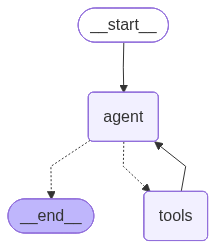

In [ ]:
from langgraph.prebuilt import create_react_agent

tools = [multiply, web_search, current_date, write_markdown]
agent = create_react_agent(llm, tools)
# system_prompt를 통해 시스템 프롬프트도 커스텀

agent

In [ ]:
agent.invoke(
    {'messages':[HumanMessage('오늘 태어난 유명인 알려줘')]})

{'messages': [HumanMessage(content='오늘 태어난 유명인 알려줘', additional_kwargs={}, response_metadata={}, id='78d25e94-ae66-4e65-8871-486c308ef850'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_GKAuWsMRr7BpBD2Hycw4hHRb', 'function': {'arguments': '{}', 'name': 'current_date'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 243, 'total_tokens': 253, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CT0j3woCGnP0yw7Akgm2LGHknm8Ud', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0abbebf8-8096-4a3f-81bc-22ef3b895342-0', tool_calls=[{'name': 'current_date', 'args': {}, 'id': 'call_GKAuWsMRr7BpBD2Hycw4hHRb', 'type': 'too